In [1]:
#Import packages and test log grabbing with grok

from pygrok import Grok
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


text = '108.28.249.14 - - [27/Apr/2023:18:49:00 +0000] "GET /images/executive-members/etosgpvkce2b0fc9904330b616e4.jpeg HTTP/2.0" 499 0 "https://rspnepal.org/" "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.1.1 Safari/605.1.15"'
pattern = '\A%{IP:ip} - - \[%{HTTPDATE:timestamp}\] "%{WORD:method} %{URIPATHPARAM:path} %{URIPROTO:protocol}/%{NUMBER:version}" %{NUMBER:response_code} %{NUMBER:content_length} "%{GREEDYDATA:referrer}" "%{GREEDYDATA:user_agent}"'
grok = Grok(pattern)
print(grok.match(text))

{'ip': '108.28.249.14', 'timestamp': '27/Apr/2023:18:49:00 +0000', 'method': 'GET', 'path': '/images/executive-members/etosgpvkce2b0fc9904330b616e4.jpeg', 'protocol': 'HTTP', 'version': '2.0', 'response_code': '499', 'content_length': '0', 'referrer': 'https://rspnepal.org/', 'user_agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.1.1 Safari/605.1.15'}


In [2]:
#parses and arranges the logs into a dictionary of lists

data = {'ip':[],
        'timestamp':[],
        'method':[],
        'path':[],
        'protocol':[],
        'version':[],
        'response_code':[],
        'content_length':[],
        'referrer':[],
        'user_agent':[]
       }


#f = open("oa_access.log", "r")
f = open("api.rspnepal.org.access.log.1", "r")

c=0
for x in f:
    a = grok.match(x)
    try:
        for i in a:
            data[i].append(a[i])
    except TypeError:  #incase of failure to parse some logs continue
        c = c+ 1
        continue
print("total none value detected is " + str(c))
 




total none value detected is 0


In [3]:
# generates a dataframe
df = pd.DataFrame(data)
display(df)

,ip,timestamp,method,path,protocol,version,response_code,content_length,referrer,user_agent
0,120.89.104.130,27/Apr/2023:00:00:34 +0000,GET,/downloads/?limit=20&page=1,HTTP,1.1,200,2704,-,Dart/2.18 (dart:io)
1,5.195.212.133,27/Apr/2023:00:00:34 +0000,GET,/district/4,HTTP,1.1,200,2852,-,Dart/2.18 (dart:io)
2,111.119.49.187,27/Apr/2023:00:00:34 +0000,GET,/app-configs,HTTP,1.1,200,90,-,Dart/2.18 (dart:io)
3,49.126.156.158,27/Apr/2023:00:00:34 +0000,OPTIONS,/district/Male,HTTP,2.0,204,0,https://www.rspnepal.org/,Mozilla/5.0 (Linux; Android 11; SM-M022G Build...
4,111.119.49.187,27/Apr/2023:00:00:34 +0000,GET,/downloads/?limit=20&page=1,HTTP,1.1,200,2704,-,Dart/2.18 (dart:io)
...,...,...,...,...,...,...,...,...,...,...
715462,176.202.56.115,27/Apr/2023:19:39:02 +0000,OPTIONS,/logout,HTTP,2.0,499,0,https://rspnepal.org/,Mozilla/5.0 (Linux; Android 10; M2006C3MG) App...
715463,99.247.224.242,27/Apr/2023:19:18:53 +0000,OPTIONS,/logout,HTTP,2.0,499,0,https://rspnepal.org/,Mozilla/5.0 (Linux; Android 10; SM-G965W) Appl...
715464,99.247.224.242,27/Apr/2023:19:18:53 +0000,OPTIONS,/executive-members?limit=50,HTTP,2.0,499,0,https://rspnepal.org/,Mozilla/5.0 (Linux; Android 10; SM-G965W) Appl...
715465,99.247.224.242,27/Apr/2023:19:18:53 +0000,OPTIONS,/dashboard/v2,HTTP,2.0,499,0,https://rspnepal.org/,Mozilla/5.0 (Linux; Android 10; SM-G965W) Appl...


In [4]:
df.describe()

,ip,timestamp,method,path,protocol,version,response_code,content_length,referrer,user_agent
count,715467,715467,715467,715467,715467,715467,715467,715467,715467,715467
unique,15498,55073,6,9536,1,2,18,9218,18,4083
top,43.204.239.5,27/Apr/2023:12:04:18 +0000,GET,/dashboard/v2,HTTP,1.1,200,0,-,Dart/2.18 (dart:io)
freq,35231,639,610933,31916,715467,560338,564610,103361,561981,516297


In [24]:
#display most active remote clients
%matplotlib inline

ips = df['ip'].value_counts()
top_ips = ips.iloc[0:15]
#horizontal_bar= top_ips.plot(kind='barh',figsize=(12,6))


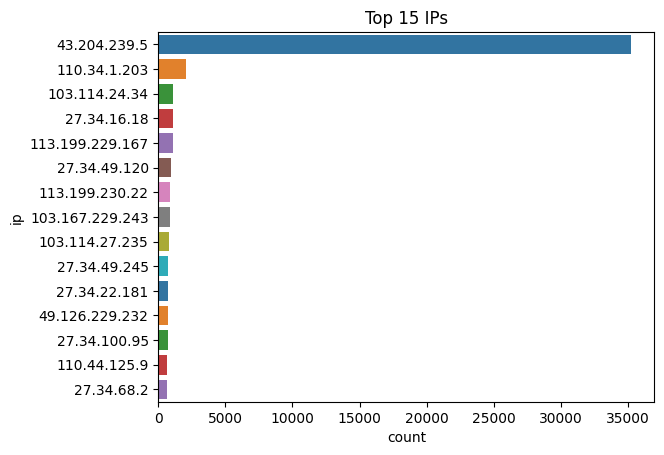

In [25]:
import seaborn as sns
top_ips = df.ip.value_counts().head(15)
filtered_df = df[df['ip'].isin(top_ips.index)]
category_counts = filtered_df.ip.value_counts()
sorted_categories = category_counts.index
sorted_categories


sns.countplot(y="ip",palette="tab10",order=sorted_categories, data=df[df.ip.isin(top_ips.index)]).set_title('Top 15 IPs');

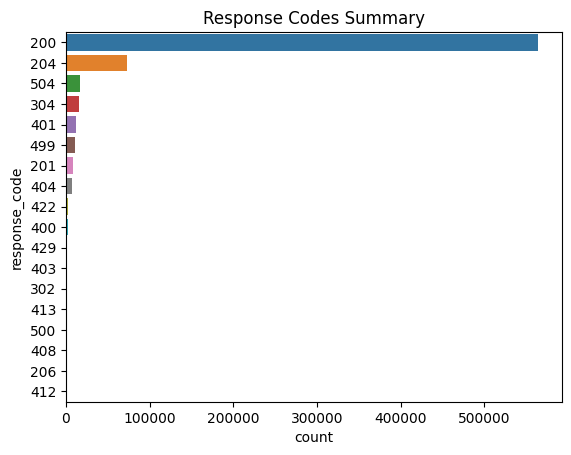

In [19]:
top_5_ips=  ips.iloc[1:2]
sns.color_palette("tab10")
category_counts = df.response_code.value_counts()
sorted_categories = category_counts.index
sns.countplot(y="response_code", data=df,palette="tab10", order=sorted_categories).set_title('Response Codes Summary');

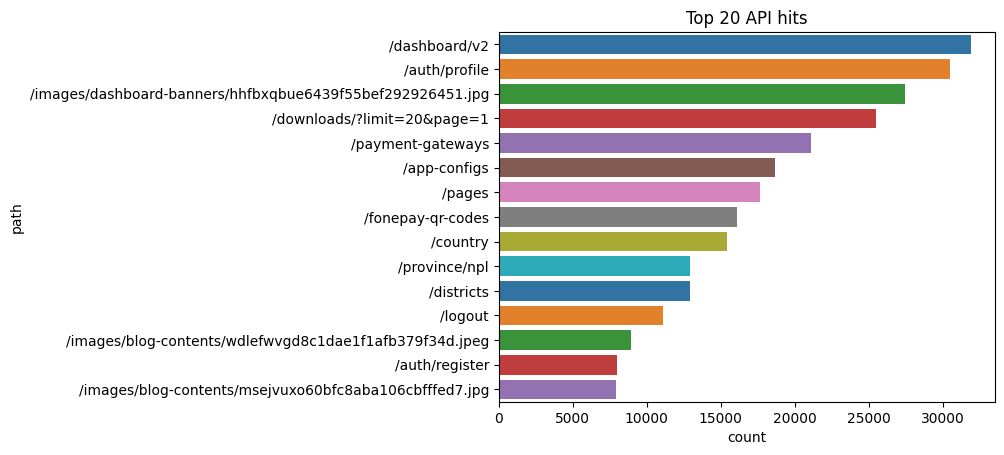

In [31]:
import matplotlib.pyplot as plt

top_20_paths = df.path.value_counts().head(15)
top_20_paths
filtered_df = df[df['path'].isin(top_20_paths.index)]
category_counts = filtered_df['path'].value_counts()
sorted_categories = category_counts.index


sns.countplot(y="path",palette="tab10", data=df[df.path.isin(top_20_paths.index)], order =sorted_categories ).set_title('Top 20 API hits');


In [ ]:
git add .